In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
import pandas as ps
import numpy as np

In [3]:
image_data = Path("E:/THESIS MALARIA/cell_images/")

In [4]:
image_data.ls()

[WindowsPath('E:/THESIS MALARIA/cell_images/Parasitized'),
 WindowsPath('E:/THESIS MALARIA/cell_images/Uninfected')]

In [5]:
np.random.seed(42)
data = ImageDataBunch.from_folder(image_data, train='.', valid_pct=0.2,ds_tfms=get_transforms(flip_vert=True, max_warp=0), size=128, bs=64, num_workers=0).normalize(imagenet_stats)

In [6]:
data.classes, data.c

(['Parasitized', 'Uninfected'], 2)

In [7]:
data.train_ds[0][0].shape


torch.Size([3, 128, 128])

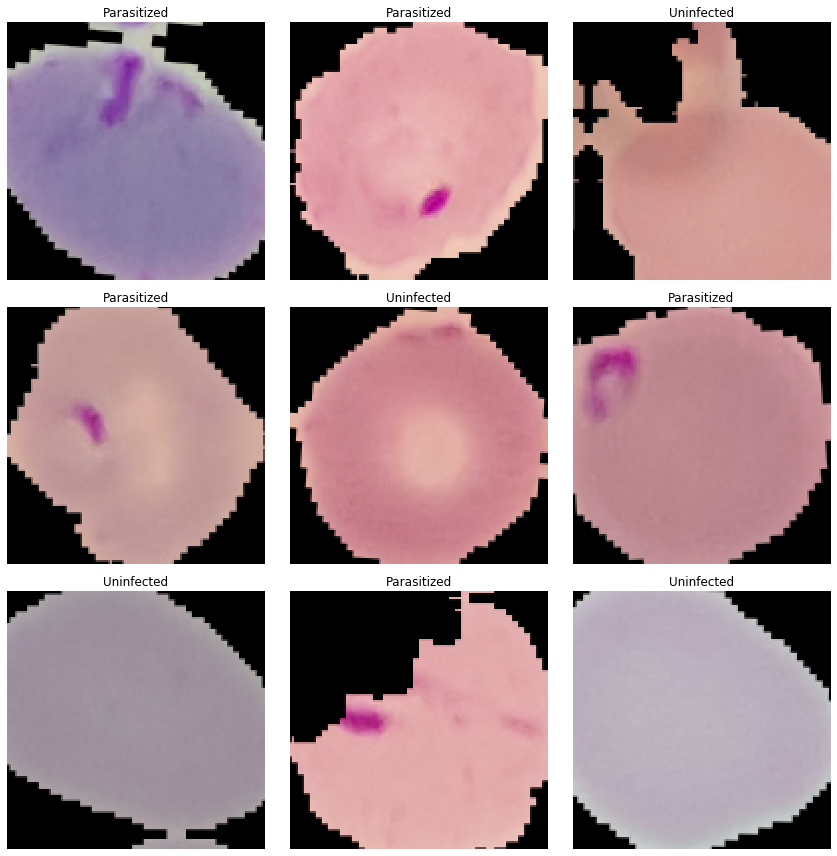

In [8]:
data.show_batch(rows=3)

In [9]:
model_path = Path('/tmp/models/')
learn = cnn_learner(data, models.resnet50, metrics=accuracy, model_dir=model_path)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to C:\Users\Abdur_Rahman/.torch\models\resnet50-19c8e357.pth
100%|███████████████████████████████████████████████████████████████| 102502400/102502400 [00:37<00:00, 2769539.71it/s]


In [10]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


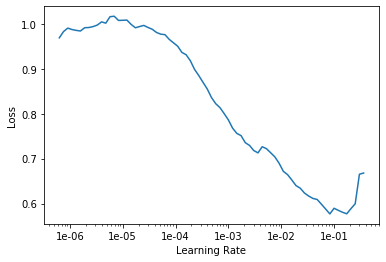

In [11]:
learn.recorder.plot()

In [12]:
learn.fit_one_cycle(5, max_lr=slice(1e-02,1e-01))

epoch,train_loss,valid_loss,accuracy,time
0,0.262631,0.290156,0.950281,02:43
1,0.294926,0.174707,0.951733,02:25
2,0.170946,0.146738,0.956814,02:30
3,0.135536,0.097273,0.964435,02:26
4,0.113070,0.094371,0.964979,02:23


In [13]:
learn.save("stage-1")
learn.unfreeze()
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


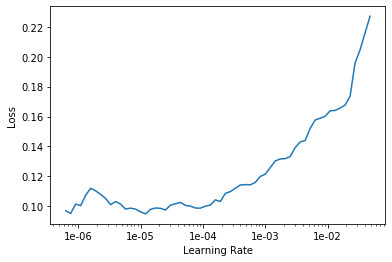

In [14]:
learn.recorder.plot()

In [16]:
learn.fit_one_cycle(5, max_lr=slice(1e-05,1e-04))

epoch,train_loss,valid_loss,accuracy,time
0,0.109499,0.088195,0.967701,02:34
1,0.102917,0.086595,0.968245,02:35
2,0.108854,0.085736,0.968608,02:37
3,0.098205,0.082771,0.970241,02:42
4,0.099791,0.084860,0.968790,02:41


In [17]:
learn.save("stage-2")
learn.load("stage-2")

Learner(data=ImageDataBunch;

Train: LabelList (22047 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
Parasitized,Parasitized,Parasitized,Parasitized,Parasitized
Path: E:\THESIS MALARIA\cell_images;

Valid: LabelList (5511 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
Parasitized,Parasitized,Uninfected,Uninfected,Uninfected
Path: E:\THESIS MALARIA\cell_images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    

In [18]:
np.random.seed(42)
data = ImageDataBunch.from_folder(image_data, train='.', valid_pct=0.2,ds_tfms=get_transforms(flip_vert=True, max_warp=0), size=224, bs=64, num_workers=0).normalize(imagenet_stats)
learn.data = data
data.train_ds[0][0].shape

torch.Size([3, 224, 224])

In [20]:
learn.freeze()
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


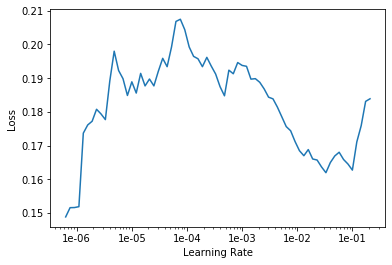

In [21]:
learn.recorder.plot()

In [22]:
learn.fit_one_cycle(3, max_lr=slice(1e-03,1e-02))


epoch,train_loss,valid_loss,accuracy,time
0,0.110778,0.088533,0.968064,05:52
1,0.113211,0.085889,0.966975,06:04
2,0.103824,0.084334,0.968427,06:02


In [23]:
learn.save("stage-3")
learn.load("stage-3")

Learner(data=ImageDataBunch;

Train: LabelList (22047 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Parasitized,Parasitized,Parasitized,Parasitized,Parasitized
Path: E:\THESIS MALARIA\cell_images;

Valid: LabelList (5511 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Parasitized,Parasitized,Uninfected,Uninfected,Uninfected
Path: E:\THESIS MALARIA\cell_images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    

In [24]:
learn.unfreeze()
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


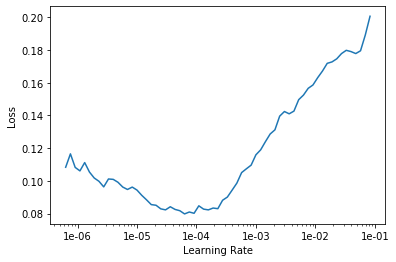

In [25]:
learn.recorder.plot()

In [26]:
learn.fit_one_cycle(4, max_lr=slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.102570,0.085900,0.966794,06:28
1,0.098962,0.080556,0.970423,06:24
2,0.089855,0.077958,0.971330,06:33
3,0.091302,0.077907,0.972237,06:35


In [27]:
learn.save("stage-4")

In [28]:
interp = ClassificationInterpretation.from_learner(learn)
losses, idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

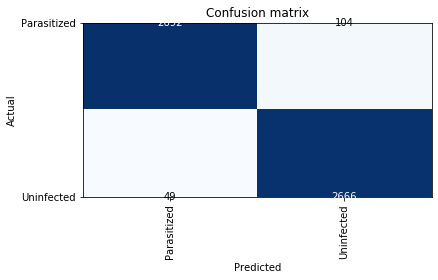

In [29]:
interp.plot_confusion_matrix()